In [2]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt 
import random as rnd

In [3]:
# MEDHODS

In [4]:
# standardize the dataset
def standardize(data):
    X = data[:,0]
    Y = data[:,1]
    
    X = (X - np.mean(X))/np.std(X)
    Y = (Y - np.mean(Y))/np.std(Y)
    
    result = np.zeros(data.shape)
    result[:,0] = X
    result[:,1] = Y 
    return result

In [5]:
## Simple perceptron 
def perceptron( epoc, rate, moment, data):
    
    data_length = data.shape[0] # extract data dimensions

    # create weights matrix 
    W = np.zeros(2)
    w1, w2  = W
    dV1, dV2 = 0, 0

    for e in range(epoc):

        # Calcluate weights 
        dW2 = (1/data_length)*np.sum((data[:,0]*w1 + w2)- data[:,1])
        dW1 = (1/data_length)*np.sum(np.multiply((data[:,0]*w1 + w2), data[:,0]) - np.multiply(data[:,1], data[:,0]))

        # Update gradients
        
        if e == 0: # initialization of momentum in first iteration 
            dV1 = dW1
            dV2 = dW2
        
        # Update wights according with momentum
        dV2 = moment*dV2 + (1-moment)*dW2
        dV1 = moment*dV1 + (1-moment)*dW1

        # Update weights
        w1 = w1 - rate*dV1
        w2 = w2 - rate*dV2


    W[0] = w1
    W[1] = w2 

    return W; 

In [12]:
def plot_perceptron_result(data,W,plot_title):
    
    #Plot the data
    sort_ind_data = np.argsort( data[:,0] )
    plt.figure()
    plt.plot(data[:,0][sort_ind_data], data[:,1][sort_ind_data], "o")
    
    x_approx = np.arange(np.amin(data[:,0]), np.amax(data[:,0]), 0.1)
    y_approx = x_approx*W[0] + W[1]
    
    plt.plot(x_approx,y_approx)
    plt.title(plot_title)

In [7]:
# TEST

In [8]:
#Read data 
train = np.array( pd.read_csv("train.txt", header = None, delim_whitespace=True, skipinitialspace=True),dtype=np.double)
test = np.array( pd.read_csv("test.txt", header = None, delim_whitespace=True, skipinitialspace=True),dtype=np.double)

# Standardize the data
train = standardize(train)
test = standardize(test)

In [9]:
#Fir the dataset
W = perceptron( 100, 0.01, 0, train)

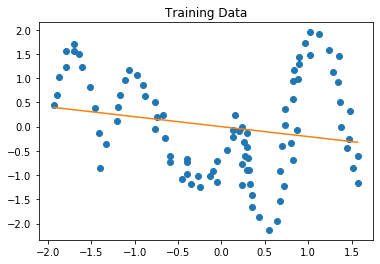

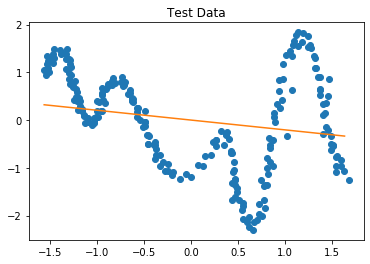

In [13]:
# Plot the fit on training data
plot_perceptron_result( test, W, 'Training Data')
plot_perceptron_result( train, W, 'Test Data')